In [ ]:
!pip install lightgbm
!pip install xgboost

In [1]:
import os


In [51]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import zipfile
import pandas as pd

In [2]:
zip_file_path='/home/pawan/Downloads/Data_science/Breastcancer/breast+cancer+wisconsin+original.zip'

In [3]:




# Open the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # List all files in the ZIP
    file_list = zip_ref.namelist()
    print("Files in ZIP:", file_list)
    
    # Specify the file name to read
    target_file = 'breast-cancer-wisconsin.data'
    
    # Ensure the file exists in the ZIP
    if target_file in file_list:
        # Read the file directly into a DataFrame
        with zip_ref.open(target_file) as file:
            df = pd.read_csv(file, header=None)
    else:
        print(f"{target_file} not found in ZIP archive.")

# Display the DataFrame
print(df)

Files in ZIP: ['Index', 'breast-cancer-wisconsin.data', 'breast-cancer-wisconsin.names', 'unformatted-data', 'wdbc.data', 'wdbc.names', 'wpbc.data', 'wpbc.names']
          0   1   2   3   4   5   6   7   8   9   10
0    1000025   5   1   1   1   2   1   3   1   1   2
1    1002945   5   4   4   5   7  10   3   2   1   2
2    1015425   3   1   1   1   2   2   3   1   1   2
3    1016277   6   8   8   1   3   4   3   7   1   2
4    1017023   4   1   1   3   2   1   3   1   1   2
..       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
694   776715   3   1   1   1   3   2   1   1   1   2
695   841769   2   1   1   1   2   1   1   1   1   2
696   888820   5  10  10   3   7   3   8  10   2   4
697   897471   4   8   6   4   3   4  10   6   1   4
698   897471   4   8   8   5   4   5  10   4   1   4

[699 rows x 11 columns]


In [49]:
df.shape

(699, 10)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
df.columns=['id','Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion',
            'Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','Class']  


In [6]:
df.head()

,id,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.drop(columns=['id'],axis=1,inplace=True)

In [9]:
df.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [10]:
df['Class'].unique()

array([2, 4])

In [11]:
df['Class']=df['Class'].map(lambda x: 1 if x==4 else 0)

In [12]:
df.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_Thickness              699 non-null    int64 
 1   Uniformity_of_Cell_Size      699 non-null    int64 
 2   Uniformity_of_Cell_Shape     699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


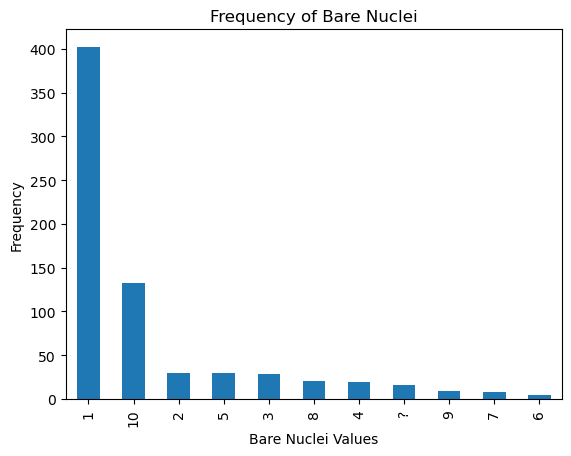

In [14]:


# Plot the frequency of each unique value
df['Bare_Nuclei'].value_counts().plot(kind='bar')
plt.title('Frequency of Bare Nuclei')
plt.xlabel('Bare Nuclei Values')
plt.ylabel('Frequency')
plt.show()

In [15]:
df['Bare_Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

In [20]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'].replace('?', -1))

In [21]:
df['Bare_Nuclei'].value_counts()

 1     402
 10    132
 2      30
 5      30
 3      28
 8      21
 4      19
-1      16
 9       9
 7       8
 6       4
Name: Bare_Nuclei, dtype: int64

In [22]:
df.columns

Index(['Clump_Thickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump_Thickness              699 non-null    int64
 1   Uniformity_of_Cell_Size      699 non-null    int64
 2   Uniformity_of_Cell_Shape     699 non-null    int64
 3   Marginal_Adhesion            699 non-null    int64
 4   Single_Epithelial_Cell_Size  699 non-null    int64
 5   Bare_Nuclei                  699 non-null    int64
 6   Bland_Chromatin              699 non-null    int64
 7   Normal_Nucleoli              699 non-null    int64
 8   Mitoses                      699 non-null    int64
 9   Class                        699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


In [24]:

X=df.drop(columns='Class',axis=1)

In [25]:
y=df['Class']

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=.2, random_state=42)

In [33]:
model=LogisticRegression()

In [34]:
model.fit(X_train,y_train)


LogisticRegression()

In [35]:

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9714285714285714


In [36]:




# Initialize the model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9642857142857143


In [37]:

# Initialize the model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.95


In [38]:

model = SVC()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9714285714285714


In [39]:

model = KNeighborsClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9857142857142858


In [40]:

model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9642857142857143


In [41]:

model = GradientBoostingClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9642857142857143


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 10.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 MB 8.8 MB/s eta 0:00:00m eta 0:00:010:00:01


In [44]:


model = XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9428571428571428


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 18.8 MB/s eta 0:00:00m eta 0:00:010:0101


In [47]:

model = LGBMClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

[LightGBM] [Info] Number of positive: 196, number of negative: 363
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97
[LightGBM] [Info] Number of data points in the train set: 559, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350626 -> initscore=-0.616288
[LightGBM] [Info] Start training from score -0.616288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [48]:

model = MLPClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9357142857142857


/home/pawan/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


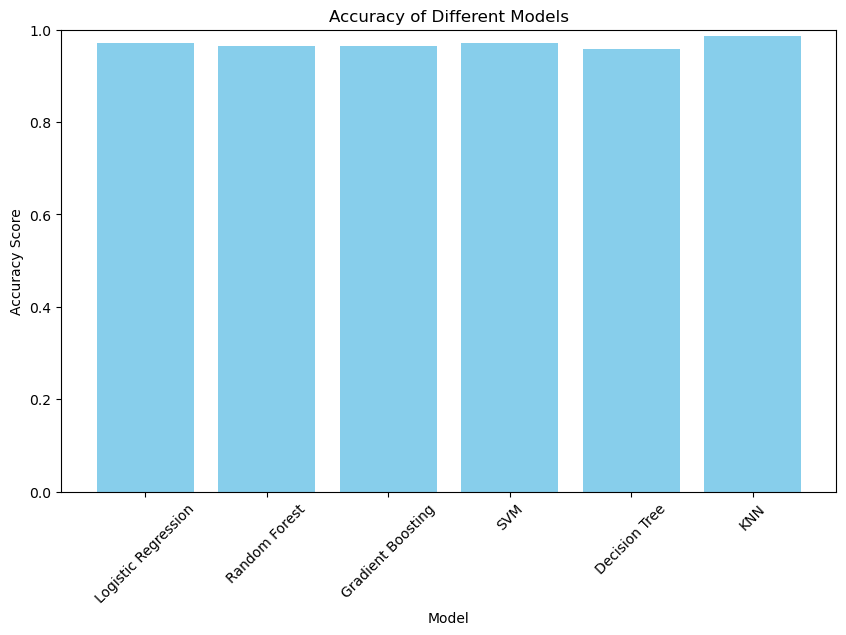

In [50]:





# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

# Train and evaluate models
accuracy_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)

# Plot accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()